# Setup Framework

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler,
        valid_data, num_epochs, stats_interval, 
        notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x108ab0048>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x108ab01d0>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

Epoch 1: 7.2s to complete
    error(train)=6.47e-01, acc(train)=7.90e-01, error(valid)=7.15e-01, acc(valid)=7.70e-01


Epoch 2: 6.6s to complete
    error(train)=5.46e-01, acc(train)=8.22e-01, error(valid)=6.34e-01, acc(valid)=7.98e-01


Epoch 3: 5.2s to complete
    error(train)=4.89e-01, acc(train)=8.35e-01, error(valid)=5.91e-01, acc(valid)=8.04e-01


Epoch 4: 6.0s to complete
    error(train)=4.49e-01, acc(train)=8.48e-01, error(valid)=5.73e-01, acc(valid)=8.12e-01


Epoch 5: 4.6s to complete
    error(train)=4.26e-01, acc(train)=8.52e-01, error(valid)=5.65e-01, acc(valid)=8.13e-01


Epoch 6: 5.1s to complete
    error(train)=4.02e-01, acc(train)=8.59e-01, error(valid)=5.51e-01, acc(valid)=8.17e-01


Epoch 7: 4.4s to complete
    error(train)=3.85e-01, acc(train)=8.65e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


Epoch 8: 5.0s to complete
    error(train)=3.68e-01, acc(train)=8.70e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


Epoch 9: 4.8s to complete
    error(train)=3.47e-01, acc(train)=8.76e-01, error(valid)=5.38e-01, acc(valid)=8.23e-01


Epoch 10: 8.1s to complete
    error(train)=3.39e-01, acc(train)=8.80e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


Epoch 11: 8.1s to complete
    error(train)=3.28e-01, acc(train)=8.82e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 12: 6.0s to complete
    error(train)=3.09e-01, acc(train)=8.89e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 13: 6.1s to complete
    error(train)=2.99e-01, acc(train)=8.92e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


Epoch 14: 4.9s to complete
    error(train)=2.92e-01, acc(train)=8.95e-01, error(valid)=5.46e-01, acc(valid)=8.30e-01


Epoch 15: 4.8s to complete
    error(train)=2.80e-01, acc(train)=8.98e-01, error(valid)=5.52e-01, acc(valid)=8.27e-01


Epoch 16: 6.6s to complete
    error(train)=2.78e-01, acc(train)=8.98e-01, error(valid)=5.55e-01, acc(valid)=8.31e-01


Epoch 17: 4.8s to complete
    error(train)=2.66e-01, acc(train)=9.04e-01, error(valid)=5.56e-01, acc(valid)=8.31e-01


Epoch 18: 4.7s to complete
    error(train)=2.62e-01, acc(train)=9.05e-01, error(valid)=5.56e-01, acc(valid)=8.31e-01


Epoch 19: 5.5s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=5.63e-01, acc(valid)=8.30e-01


Epoch 20: 5.0s to complete
    error(train)=2.54e-01, acc(train)=9.07e-01, error(valid)=5.64e-01, acc(valid)=8.29e-01


Epoch 21: 6.1s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=5.65e-01, acc(valid)=8.30e-01


Epoch 22: 6.6s to complete
    error(train)=2.43e-01, acc(train)=9.12e-01, error(valid)=5.66e-01, acc(valid)=8.30e-01


Epoch 23: 6.1s to complete
    error(train)=2.42e-01, acc(train)=9.13e-01, error(valid)=5.71e-01, acc(valid)=8.29e-01


Epoch 24: 5.3s to complete
    error(train)=2.38e-01, acc(train)=9.14e-01, error(valid)=5.69e-01, acc(valid)=8.29e-01


Epoch 25: 8.7s to complete
    error(train)=2.99e-01, acc(train)=8.86e-01, error(valid)=6.09e-01, acc(valid)=8.14e-01


Epoch 26: 4.7s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=5.91e-01, acc(valid)=8.21e-01


Epoch 27: 5.0s to complete
    error(train)=2.80e-01, acc(train)=8.95e-01, error(valid)=6.11e-01, acc(valid)=8.18e-01


Epoch 28: 4.7s to complete
    error(train)=2.71e-01, acc(train)=8.98e-01, error(valid)=6.11e-01, acc(valid)=8.21e-01


Epoch 29: 4.9s to complete
    error(train)=2.64e-01, acc(train)=8.99e-01, error(valid)=6.13e-01, acc(valid)=8.22e-01


Epoch 30: 5.3s to complete
    error(train)=2.66e-01, acc(train)=8.99e-01, error(valid)=6.26e-01, acc(valid)=8.19e-01


Epoch 31: 4.8s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=6.24e-01, acc(valid)=8.17e-01


Epoch 32: 5.1s to complete
    error(train)=2.57e-01, acc(train)=9.02e-01, error(valid)=6.43e-01, acc(valid)=8.16e-01


Epoch 33: 5.7s to complete
    error(train)=2.50e-01, acc(train)=9.04e-01, error(valid)=6.47e-01, acc(valid)=8.17e-01


Epoch 34: 5.3s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=6.53e-01, acc(valid)=8.17e-01


Epoch 35: 5.3s to complete
    error(train)=2.37e-01, acc(train)=9.07e-01, error(valid)=6.56e-01, acc(valid)=8.21e-01


Epoch 36: 5.8s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=6.71e-01, acc(valid)=8.19e-01


Epoch 37: 4.8s to complete
    error(train)=2.31e-01, acc(train)=9.11e-01, error(valid)=6.76e-01, acc(valid)=8.20e-01


Epoch 38: 5.0s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=6.86e-01, acc(valid)=8.15e-01


Epoch 39: 5.4s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=7.05e-01, acc(valid)=8.16e-01


Epoch 40: 5.6s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=7.03e-01, acc(valid)=8.20e-01


Epoch 41: 5.3s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=7.10e-01, acc(valid)=8.19e-01


Epoch 42: 5.9s to complete
    error(train)=2.05e-01, acc(train)=9.20e-01, error(valid)=7.11e-01, acc(valid)=8.18e-01


Epoch 43: 5.3s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=7.54e-01, acc(valid)=8.11e-01


Epoch 44: 8.6s to complete
    error(train)=1.96e-01, acc(train)=9.24e-01, error(valid)=7.31e-01, acc(valid)=8.17e-01


Epoch 45: 5.4s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=7.51e-01, acc(valid)=8.16e-01


Epoch 46: 5.1s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=7.61e-01, acc(valid)=8.13e-01


Epoch 47: 7.1s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=7.76e-01, acc(valid)=8.19e-01


Epoch 48: 6.3s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=7.79e-01, acc(valid)=8.15e-01


Epoch 49: 6.8s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=7.93e-01, acc(valid)=8.11e-01


Epoch 50: 6.6s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.15e-01, acc(valid)=8.10e-01


Epoch 51: 7.3s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=8.16e-01, acc(valid)=8.17e-01


Epoch 52: 6.6s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=8.27e-01, acc(valid)=8.13e-01


Epoch 53: 6.5s to complete
    error(train)=1.69e-01, acc(train)=9.33e-01, error(valid)=8.22e-01, acc(valid)=8.13e-01


Epoch 54: 6.6s to complete
    error(train)=1.68e-01, acc(train)=9.33e-01, error(valid)=8.44e-01, acc(valid)=8.13e-01


Epoch 55: 6.8s to complete
    error(train)=1.62e-01, acc(train)=9.35e-01, error(valid)=8.68e-01, acc(valid)=8.12e-01


Epoch 56: 7.3s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=8.79e-01, acc(valid)=8.12e-01


Epoch 57: 6.3s to complete
    error(train)=1.50e-01, acc(train)=9.41e-01, error(valid)=8.77e-01, acc(valid)=8.14e-01


Epoch 58: 5.7s to complete
    error(train)=1.48e-01, acc(train)=9.41e-01, error(valid)=8.96e-01, acc(valid)=8.12e-01


Epoch 59: 5.1s to complete
    error(train)=1.50e-01, acc(train)=9.40e-01, error(valid)=9.28e-01, acc(valid)=8.12e-01


Epoch 60: 5.2s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=9.32e-01, acc(valid)=8.13e-01


Epoch 61: 5.3s to complete
    error(train)=1.43e-01, acc(train)=9.43e-01, error(valid)=9.31e-01, acc(valid)=8.12e-01


Epoch 62: 5.0s to complete
    error(train)=1.39e-01, acc(train)=9.45e-01, error(valid)=9.35e-01, acc(valid)=8.13e-01


Epoch 63: 6.3s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=9.63e-01, acc(valid)=8.11e-01


Epoch 64: 6.3s to complete
    error(train)=1.35e-01, acc(train)=9.47e-01, error(valid)=9.76e-01, acc(valid)=8.10e-01


Epoch 65: 5.3s to complete
    error(train)=1.26e-01, acc(train)=9.51e-01, error(valid)=9.78e-01, acc(valid)=8.10e-01


Epoch 66: 5.6s to complete
    error(train)=1.24e-01, acc(train)=9.52e-01, error(valid)=9.97e-01, acc(valid)=8.10e-01


Epoch 67: 9.5s to complete
    error(train)=1.21e-01, acc(train)=9.52e-01, error(valid)=1.01e+00, acc(valid)=8.13e-01


Epoch 68: 6.8s to complete
    error(train)=1.22e-01, acc(train)=9.52e-01, error(valid)=1.02e+00, acc(valid)=8.11e-01


Epoch 69: 6.9s to complete
    error(train)=1.15e-01, acc(train)=9.54e-01, error(valid)=1.04e+00, acc(valid)=8.14e-01


Epoch 70: 7.6s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=1.05e+00, acc(valid)=8.09e-01


Epoch 71: 9.0s to complete
    error(train)=1.12e-01, acc(train)=9.57e-01, error(valid)=1.06e+00, acc(valid)=8.11e-01


Epoch 72: 5.3s to complete
    error(train)=1.11e-01, acc(train)=9.57e-01, error(valid)=1.07e+00, acc(valid)=8.10e-01


Epoch 73: 5.2s to complete
    error(train)=1.11e-01, acc(train)=9.56e-01, error(valid)=1.08e+00, acc(valid)=8.09e-01


Epoch 74: 5.1s to complete
    error(train)=1.08e-01, acc(train)=9.58e-01, error(valid)=1.11e+00, acc(valid)=8.10e-01


Epoch 75: 5.6s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=1.11e+00, acc(valid)=8.10e-01


Epoch 76: 5.4s to complete
    error(train)=1.02e-01, acc(train)=9.60e-01, error(valid)=1.13e+00, acc(valid)=8.12e-01


Epoch 77: 4.9s to complete
    error(train)=9.94e-02, acc(train)=9.61e-01, error(valid)=1.14e+00, acc(valid)=8.12e-01


Epoch 78: 8.2s to complete
    error(train)=9.89e-02, acc(train)=9.61e-01, error(valid)=1.15e+00, acc(valid)=8.11e-01


Epoch 79: 5.7s to complete
    error(train)=9.70e-02, acc(train)=9.64e-01, error(valid)=1.15e+00, acc(valid)=8.07e-01


Epoch 80: 7.2s to complete
    error(train)=9.34e-02, acc(train)=9.64e-01, error(valid)=1.17e+00, acc(valid)=8.10e-01


Epoch 81: 5.8s to complete
    error(train)=9.41e-02, acc(train)=9.64e-01, error(valid)=1.19e+00, acc(valid)=8.08e-01


Epoch 82: 5.8s to complete
    error(train)=9.12e-02, acc(train)=9.66e-01, error(valid)=1.19e+00, acc(valid)=8.09e-01


Epoch 83: 5.7s to complete
    error(train)=9.18e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.06e-01


Epoch 84: 6.3s to complete
    error(train)=8.79e-02, acc(train)=9.66e-01, error(valid)=1.21e+00, acc(valid)=8.09e-01


Epoch 85: 5.0s to complete
    error(train)=8.76e-02, acc(train)=9.67e-01, error(valid)=1.23e+00, acc(valid)=8.07e-01


Epoch 86: 4.9s to complete
    error(train)=8.69e-02, acc(train)=9.67e-01, error(valid)=1.23e+00, acc(valid)=8.07e-01


Epoch 87: 5.0s to complete
    error(train)=8.49e-02, acc(train)=9.68e-01, error(valid)=1.24e+00, acc(valid)=8.07e-01


Epoch 88: 4.8s to complete
    error(train)=8.28e-02, acc(train)=9.69e-01, error(valid)=1.26e+00, acc(valid)=8.07e-01


Epoch 89: 5.2s to complete
    error(train)=8.37e-02, acc(train)=9.69e-01, error(valid)=1.26e+00, acc(valid)=8.05e-01


Epoch 90: 5.0s to complete
    error(train)=8.26e-02, acc(train)=9.70e-01, error(valid)=1.28e+00, acc(valid)=8.05e-01


Epoch 91: 7.0s to complete
    error(train)=8.14e-02, acc(train)=9.69e-01, error(valid)=1.29e+00, acc(valid)=8.09e-01


Epoch 92: 8.0s to complete
    error(train)=7.98e-02, acc(train)=9.70e-01, error(valid)=1.29e+00, acc(valid)=8.08e-01


Epoch 93: 5.9s to complete
    error(train)=7.92e-02, acc(train)=9.70e-01, error(valid)=1.29e+00, acc(valid)=8.06e-01


Epoch 94: 7.0s to complete
    error(train)=7.84e-02, acc(train)=9.71e-01, error(valid)=1.30e+00, acc(valid)=8.07e-01


Epoch 95: 5.6s to complete
    error(train)=7.83e-02, acc(train)=9.71e-01, error(valid)=1.31e+00, acc(valid)=8.08e-01


Epoch 96: 6.7s to complete
    error(train)=7.79e-02, acc(train)=9.72e-01, error(valid)=1.32e+00, acc(valid)=8.06e-01


Epoch 97: 8.6s to complete
    error(train)=7.72e-02, acc(train)=9.71e-01, error(valid)=1.32e+00, acc(valid)=8.07e-01


Epoch 98: 5.2s to complete
    error(train)=7.62e-02, acc(train)=9.72e-01, error(valid)=1.33e+00, acc(valid)=8.08e-01


Epoch 99: 8.0s to complete
    error(train)=7.50e-02, acc(train)=9.72e-01, error(valid)=1.34e+00, acc(valid)=8.06e-01


Epoch 100: 6.4s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.29e+00, acc(valid)=8.01e-01



--------------------------------------------------------------------------------
Ti=25.00
--------------------------------------------------------------------------------


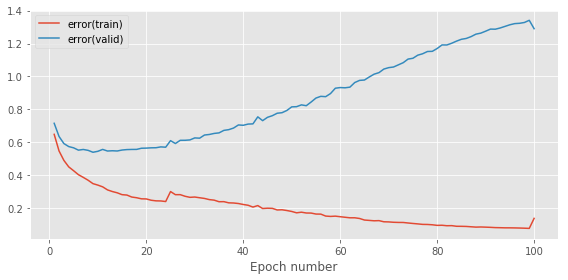

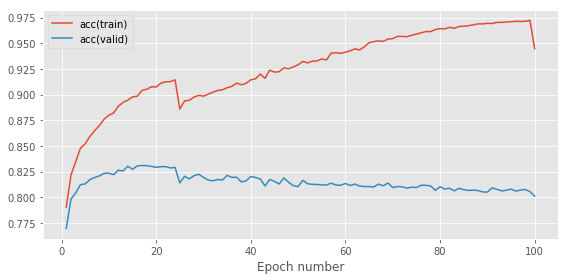

    final error(train) = 1.36e-01
    final error(valid) = 1.29e+00
    final acc(train)   = 9.45e-01
    final acc(valid)   = 8.01e-01
    run time per epoch = 7.71


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

total_iters_per_period = 25

#setup hyperparameters
min_learning_rate = 0.0001
max_learning_rate = 0.001
max_learning_rate_discount_factor = 0.8
period_iteration_expansion_factor = 3
num_epochs = 100

stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate, max_learning_rate, total_iters_per_period, max_learning_rate_discount_factor,
                 period_iteration_expansion_factor)

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.tight_layout()
fig_1_name = "SGD_fig_1_" + str(total_iters_per_period) + ".pdf"
fig_1.savefig(fig_1_name)

fig_2.tight_layout()
fig_2_name = "SGD_fig_2_" + str(total_iters_per_period) + ".pdf"
fig_2.savefig(fig_2_name)

print('-' * 80)
print('Ti={0:.2f}'
      .format(total_iters_per_period))
print('-' * 80)

plt.show()

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))